In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/kaggle/input/chess-blunders-dataset/chess_blunder_dataset.csv')
df.head()

#pls use the proper path of the dataset, the dataset is already live
# on kaggle you may search chess-blunders-dataset or explore my work section, 
#you will get it from there and add it to your input directory 
#then run this command

,mood,caffeine,sleep_hours,opponent_rating,time_control,notifications,music_type,blunder_moves
0,7,2,9,1092,1,0,2,24
1,4,2,7,906,2,19,3,24
2,8,1,3,1738,2,10,0,8
3,5,0,3,1591,2,16,3,2
4,7,3,9,1563,3,7,0,28


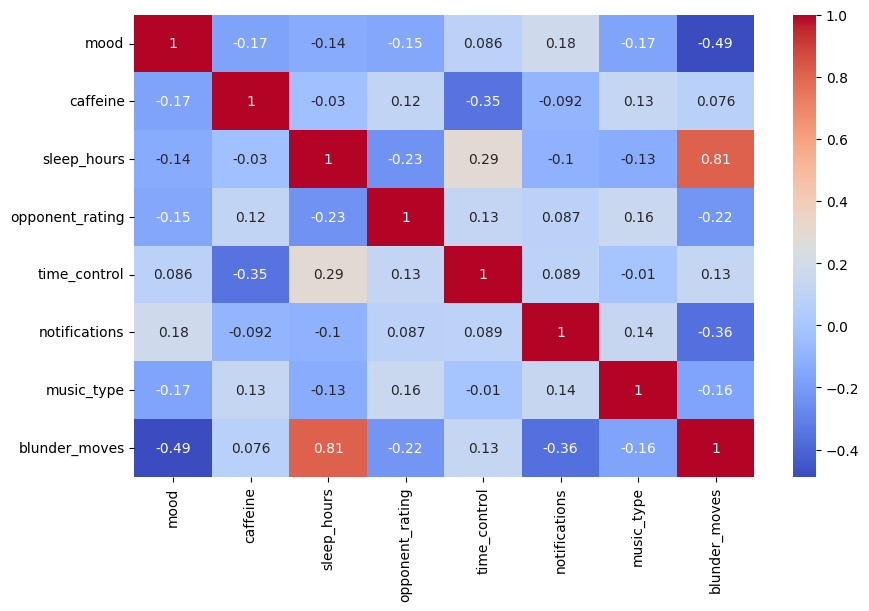

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [4]:
X = df[['mood', 'caffeine', 'sleep_hours', 'opponent_rating', 'time_control', 'notifications', 'music_type']]
y = df['blunder_moves']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = lr_model.predict(X_test)

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 2.81
R² Score: 0.87


In [10]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))

           Feature  Coefficient
2      sleep_hours     2.718329
0             mood    -1.108189
6       music_type    -0.625609
4     time_control    -0.206226
1         caffeine     0.199412
5    notifications    -0.174840
3  opponent_rating    -0.001637


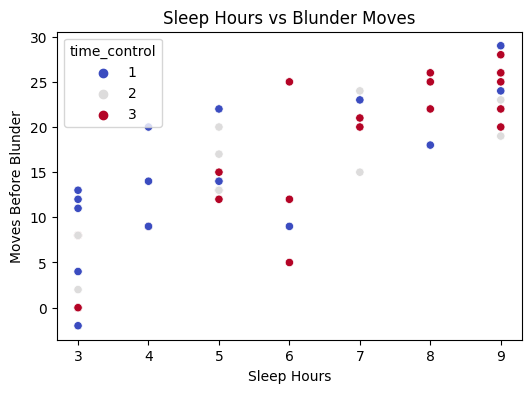

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='sleep_hours', y='blunder_moves', data=df, hue='time_control', palette='coolwarm')
plt.title('Sleep Hours vs Blunder Moves')
plt.xlabel('Sleep Hours')
plt.ylabel('Moves Before Blunder')
plt.show()

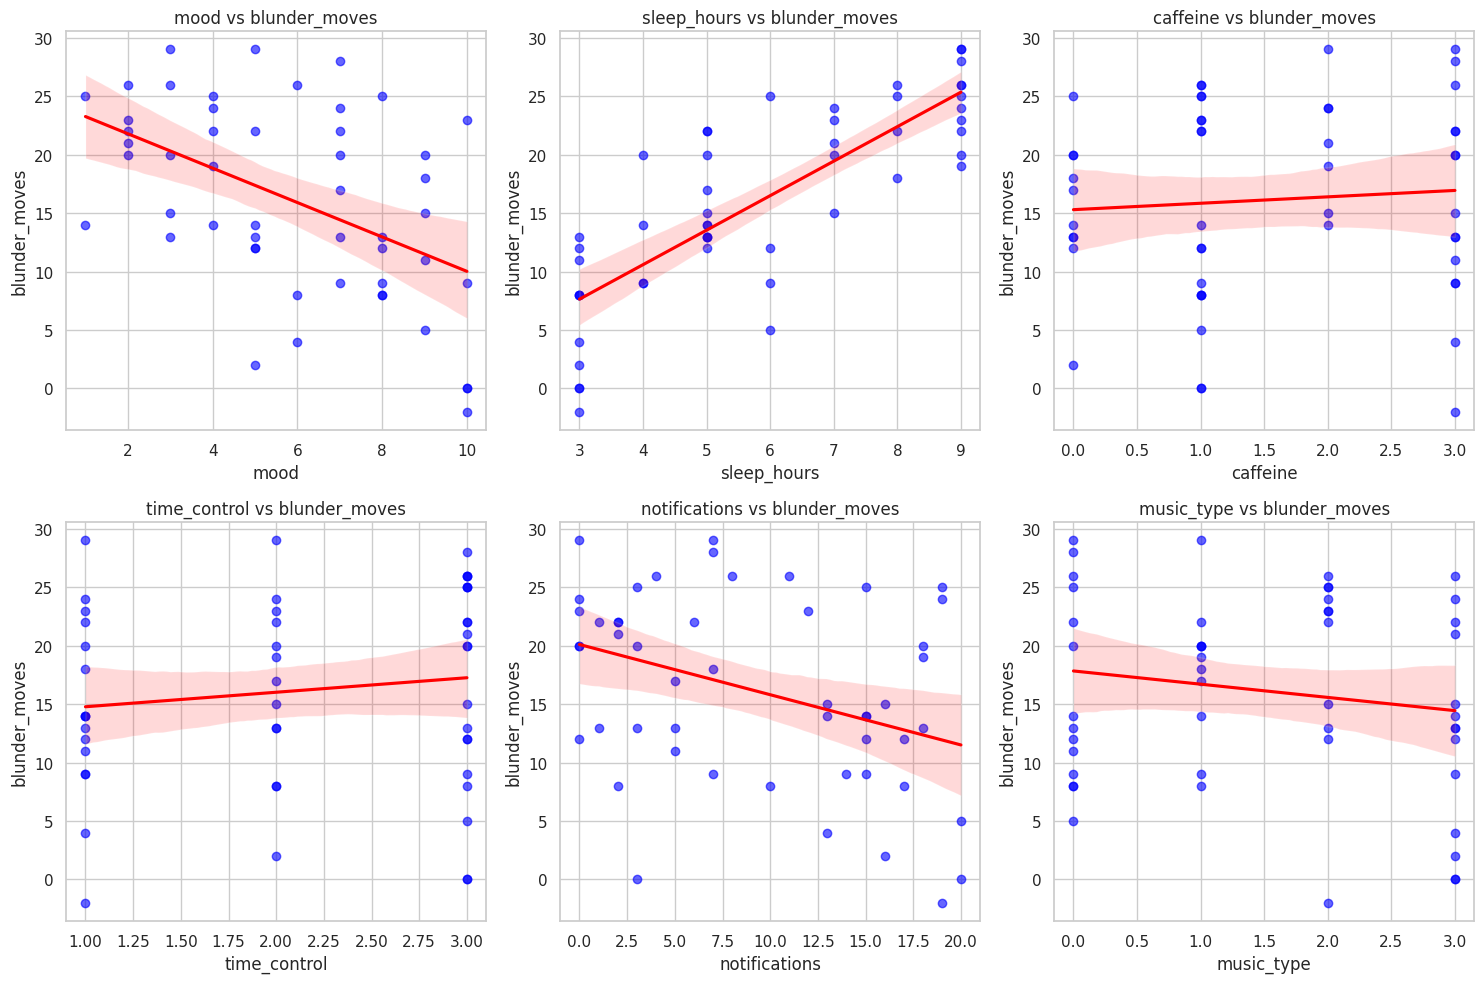

In [12]:

features = ['mood', 'sleep_hours', 'caffeine', 'time_control', 'notifications', 'music_type']
target = 'blunder_moves'

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  
    sns.regplot(x=feature, y=target, data=df, scatter_kws={'alpha':0.6, 'color':'blue'},
                line_kws={'color':'red'})
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()


In [13]:
new_data = pd.DataFrame({
    'mood': [7],              
    'caffeine': [2],          
    'sleep_hours': [6],       
    'opponent_rating': [1800],
    'time_control': [2],      
    'notifications': [5],     
    'music_type': [1]         
})

In [14]:
predicted_moves = lr_model.predict(new_data)

In [15]:

predicted_moves_rounded = round(predicted_moves[0])
print(f"Predicted moves before first blunder: {predicted_moves_rounded}")


Predicted moves before first blunder: 16
